# **Boostinng 2**

### Q1. What is Gradient Boosting Regression?
Gradient Boosting Regression is an ensemble learning technique used for regression tasks. It builds a predictive model by sequentially adding predictors, usually decision trees, in such a way that each new predictor corrects the errors made by the previous predictors. The algorithm optimizes a loss function by adding weak learners that minimize the loss using gradient descent techniques.

### Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.


Mean Squared Error: 2.2733847922378922
R-squared: 0.7344176644581901


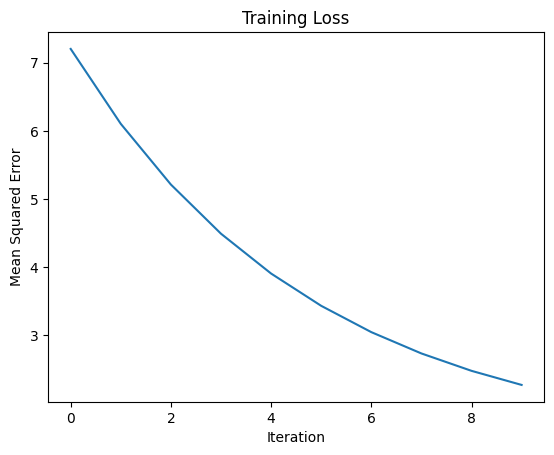

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Simple dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([3, 6, 2, 8, 7, 5, 6, 9, 10, 12])

class SimpleGBR:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.losses = []

    def fit(self, X, y):
        # Initial prediction
        y_pred = np.mean(y)
        self.models.append(y_pred)

        for i in range(self.n_estimators):
            # Compute residuals
            residuals = y - y_pred

            # Fit a simple model to residuals
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residuals)
            self.models.append(model)

            # Update prediction
            y_pred += self.learning_rate * model.predict(X)
            self.losses.append(mean_squared_error(y, y_pred))

    def predict(self, X):
        y_pred = self.models[0]
        for model in self.models[1:]:
            y_pred += self.learning_rate * model.predict(X)
        return y_pred

# Train the model
gbr = SimpleGBR(n_estimators=10, learning_rate=0.1, max_depth=2)
gbr.fit(X, y)
y_pred = gbr.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the losses
plt.plot(gbr.losses)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss')
plt.show()

### Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters.


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

# Initialize the model
model = GradientBoostingRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Best Score: 4.594842448588412


### Q4. What is a weak learner in Gradient Boosting?
A weak learner in Gradient Boosting is a simple model that performs slightly better than random guessing. Typically, decision stumps (shallow decision trees) are used as weak learners. These models are "weak" because they generally have low predictive power individually but can be combined to form a strong learner.

### Q5. What is the intuition behind the Gradient Boosting algorithm?
The intuition behind Gradient Boosting is to improve the predictive performance of the model by focusing on the mistakes of the previous models. Each subsequent model is trained to predict the residuals (errors) of the previous model. By iteratively adding these weak models, the overall model's performance improves.

### Q6. How does the Gradient Boosting algorithm build an ensemble of weak learners?
Gradient Boosting builds an ensemble of weak learners by:
1. Starting with an initial model (e.g., a constant value).
2. Iteratively adding new models that predict the residuals of the combined ensemble of previous models.
3. Each new model is fit to the negative gradient of the loss function (hence "gradient" boosting) to reduce the error.
4. The predictions of these models are combined using a weighted sum, with each model's contribution scaled by a learning rate.

### Q7. What are the steps involved in constructing the mathematical intuition of the Gradient Boosting algorithm?

1. **Initialize the Model**: Start with an initial prediction, usually the mean of the target values for regression.
   \[
   \hat{y}_0 = \frac{1}{N} \sum_{i=1}^{N} y_i
   \]

2. **Compute Residuals**: For each subsequent iteration, compute the residuals (errors) from the current model.
   \[
   r_{i} = y_{i} - \hat{y}_{i}
   \]

3. **Fit a Weak Learner**: Train a weak learner (e.g., a decision tree) on the residuals.
   \[
   h_m(x) \approx r_i
   \]

4. **Update the Model**: Update the current model by adding the predictions of the new weak learner, scaled by a learning rate.
   \[
   \hat{y}_{i} = \hat{y}_{i} + \alpha h_m(x_i)
   \]
   where \(\alpha\) is the learning rate.

5. **Repeat**: Iterate steps 2-4 for a specified number of iterations or until convergence.

6. **Final Prediction**: The final model is the sum of all the weak learners.
   \[
   \hat{y} = \sum_{m=1}^{M} \alpha h_m(x)
   \]

Each iteration aims to reduce the residual errors of the previous iterations, gradually improving the overall model.

# **COMPLETE**